<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Bike_sharing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [11]:
import io 
data = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
print('Following the information for the hours dataset for the bike sharing \n', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Following the information for the hours dataset f

In [14]:
# Let's do some preprocessing 
# let's rename the dataset with more readable form 
data.rename(
    columns = {
        'instant':'rec_id',
        'dteday' :'datetime',
        'holiday': 'is_holiday',
        'workingday':'is_workingday',
        'weathersit': 'weather_condition',
        'hum': 'humidity',
        'mnth': 'month',
        'cnt': 'total_count',
        'hr': 'hour',
        'yr':'year'
    }, inplace=True
)

In [29]:
data.head(5)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
#now lets set the dataset with proper datatypes
data['datetime'] = pd.to_datetime(data.datetime)


# categorical variables 
data['is_holiday']= data.is_holiday.astype('category')
data['season'] = data.season.astype('category')
data['weekday'] = data.weekday.astype('category')
data['weather_condition'] = data.weather_condition.astype('category')
data['is_workingday'] = data.is_workingday.astype('category')
data['month'] = data.month.astype('category')
data['year'] = data.year.astype('category')
data['hour'] = data.hour.astype('category')


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [21]:
# as you can see now the Dtypes are changed and we are getting Dtype as int64, datetime64, Category, float64, int64,

#### Let's explore the data now by ploting some figures 

In [22]:
# configuring figures 
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

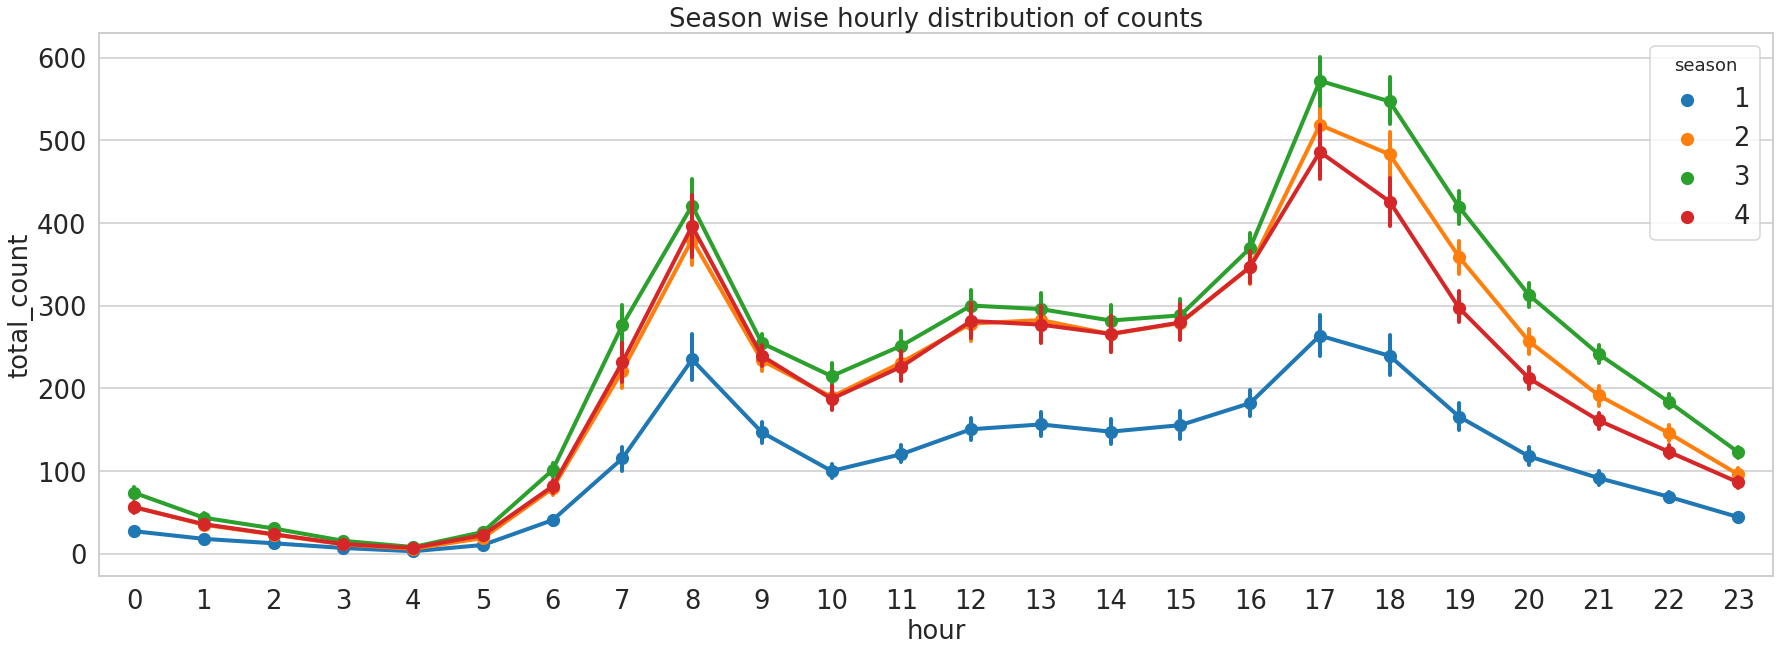

In [23]:
fig, ax = plt.subplots()
sns.pointplot(
    data= data, 
    x = 'hour', 
    y = 'total_count', 
    hue='season',
    ax=ax
)
ax.set(title="Season wise hourly distribution of counts")

- from the figure it is clear that the hours 7 to 9 and 15 to 20 are peak hours and most of the time season 2,3,4 have highest count for bike sharing 
- Season blue is particularly showing less count than others .. I think beause that season may have less number of vaccation or holidays{Springer}

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

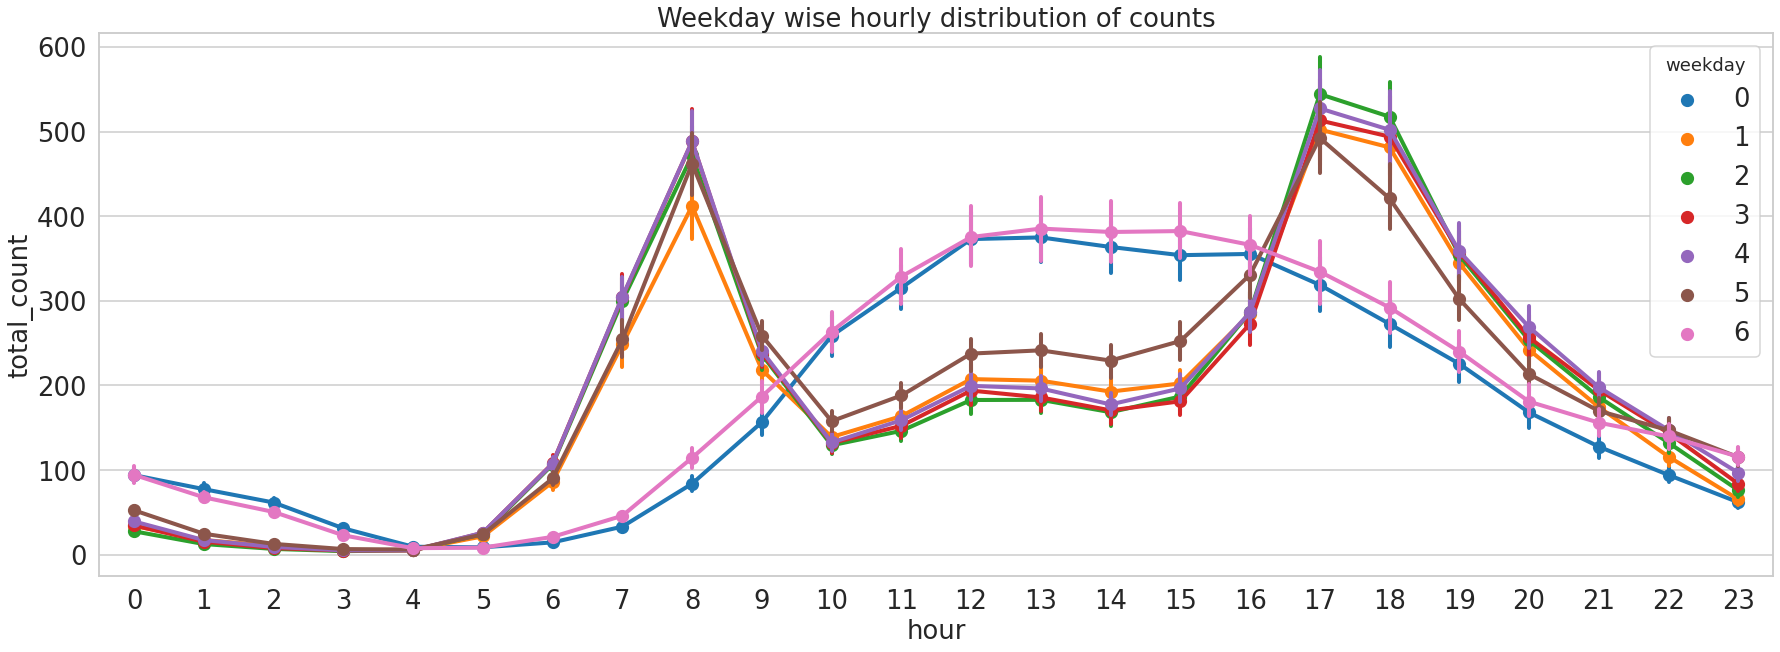

In [26]:
# now lets explore for weekly effects 
fig, ax = plt.subplots()
sns.pointplot(
    data= data, 
    x = 'hour', 
    y = 'total_count', 
    hue='weekday',
    ax=ax
)
ax.set(title="Weekday wise hourly distribution of counts")

- here also 7-9 hours are peak hours and 16-20 too 
-but for weekday 0 & 6 there's something different, as their peak hour is 9 to 19  
- maybe these to are weekend days .. saturday and sunday(It is just a guess)

[Text(0.5, 1.0, 'MOnthly distribution of count')]

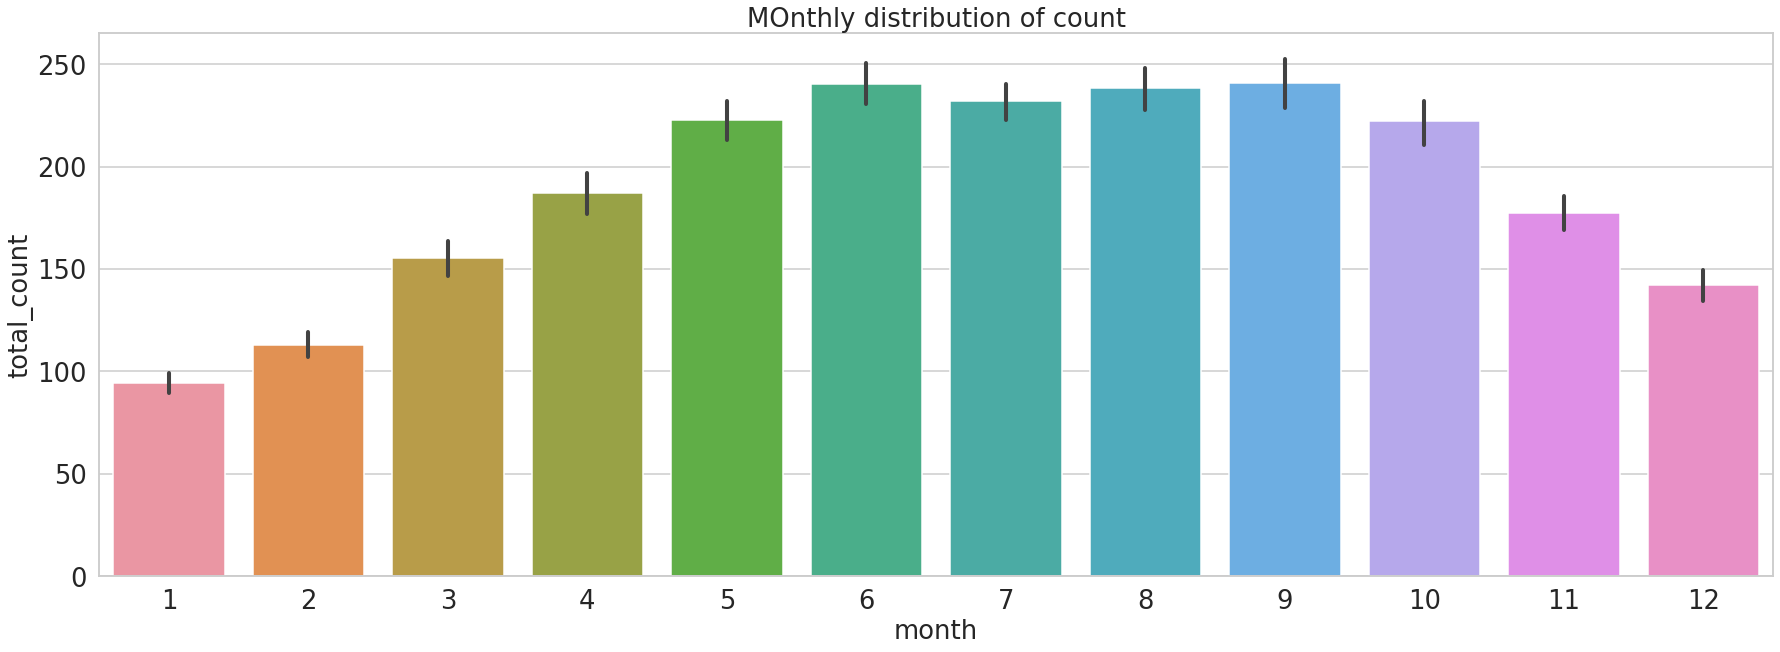

In [31]:
# let's explore month wise total count on bike sharing 
fig, ax = plt.subplots()
sns.barplot(
    data = data, 
    x = 'month', 
    y= 'total_count',
    ax = ax)
ax.set(title='MOnthly distribution of count')

[Text(0.5, 1.0, 'Seasonal distribution of count')]

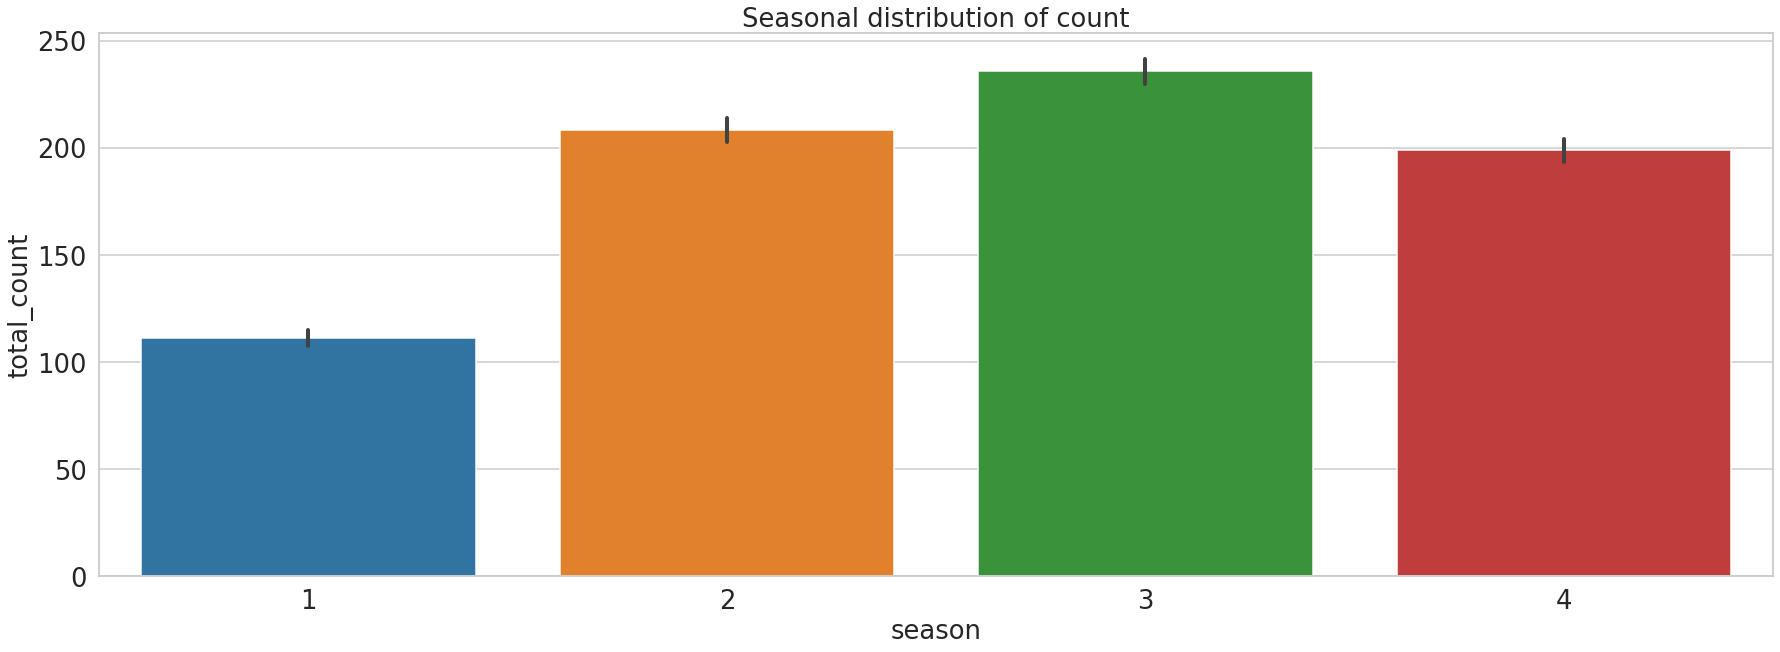

In [32]:
# now lets do seasonal distribution of count 

fig, ax = plt.subplots()
sns.barplot(
    data = data, 
    x = 'season', 
    y= 'total_count',
    ax = ax)
ax.set(title='Seasonal distribution of count')

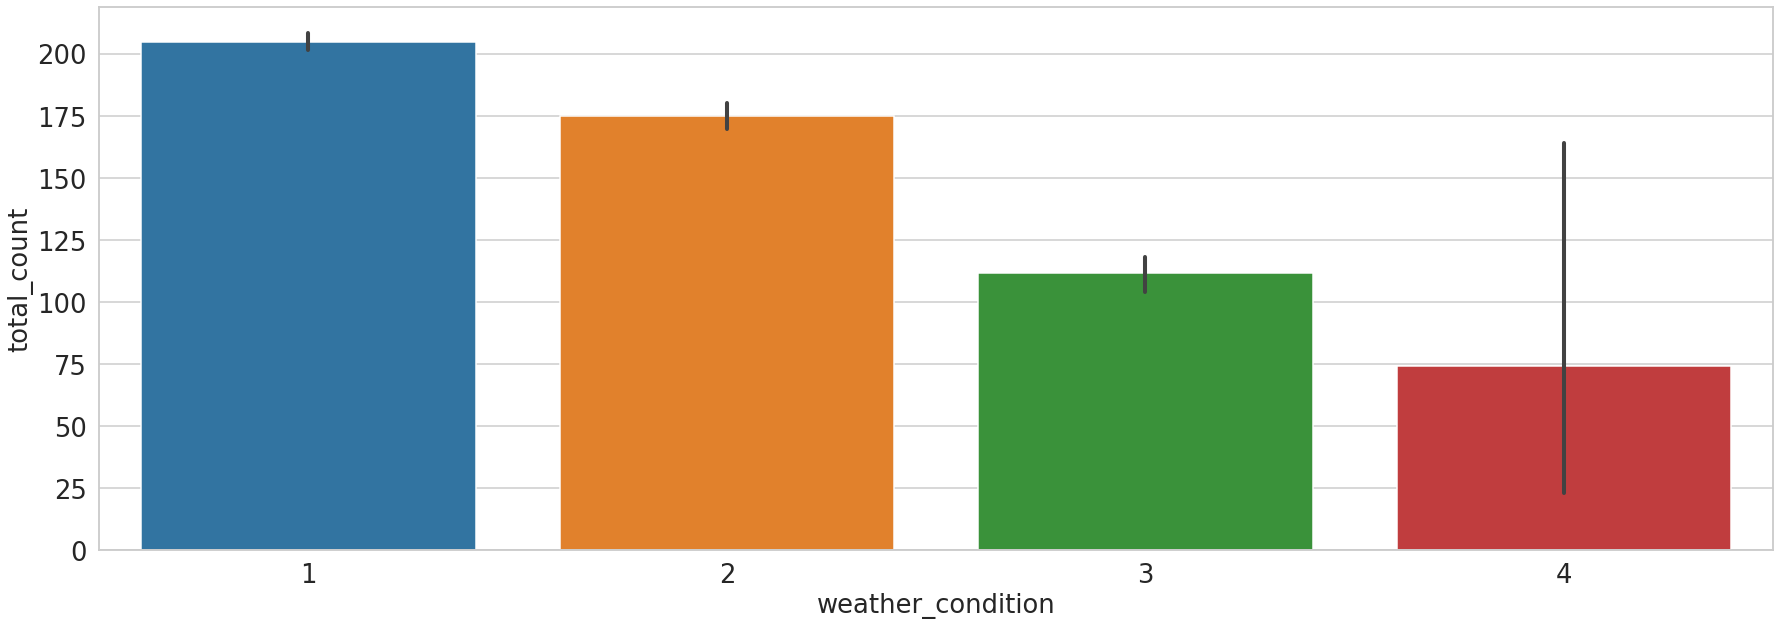

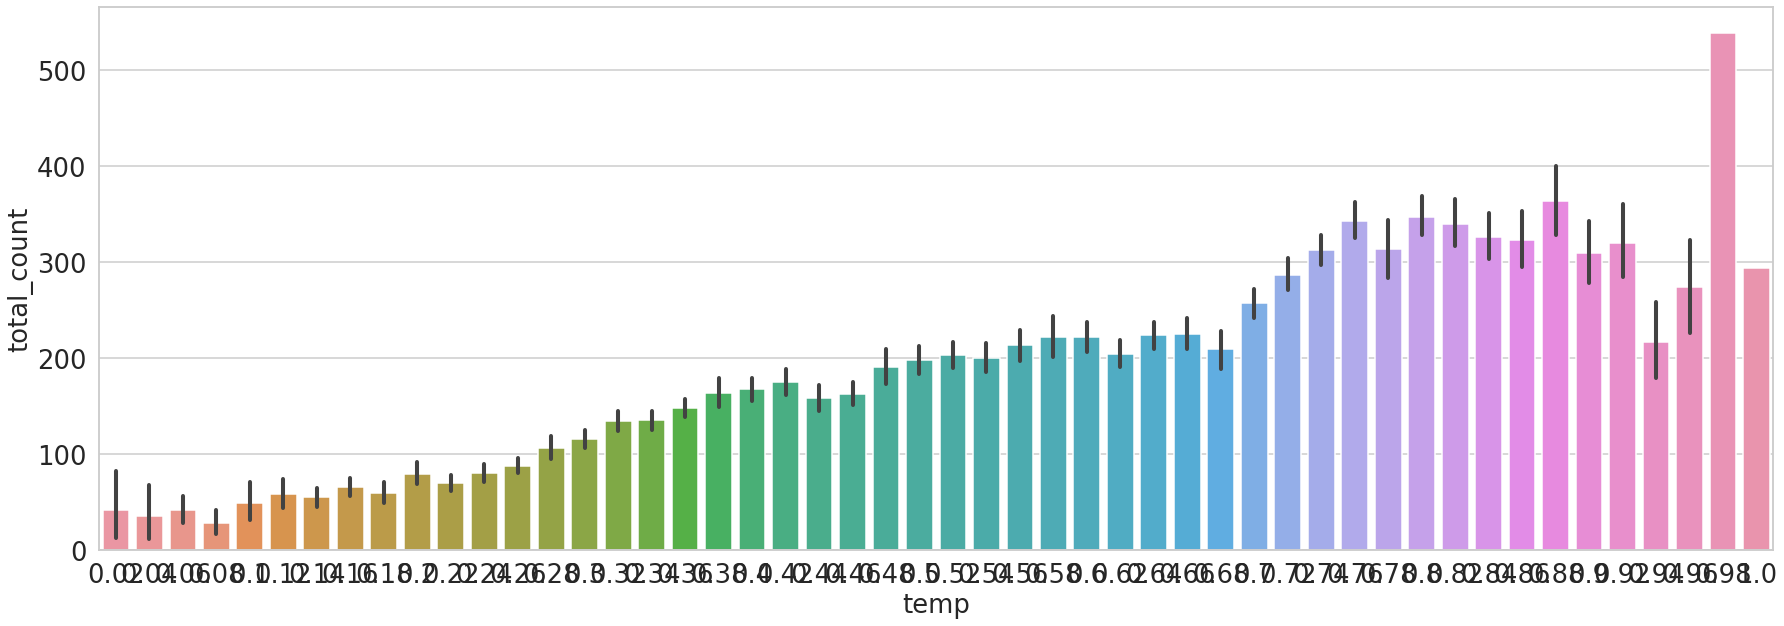

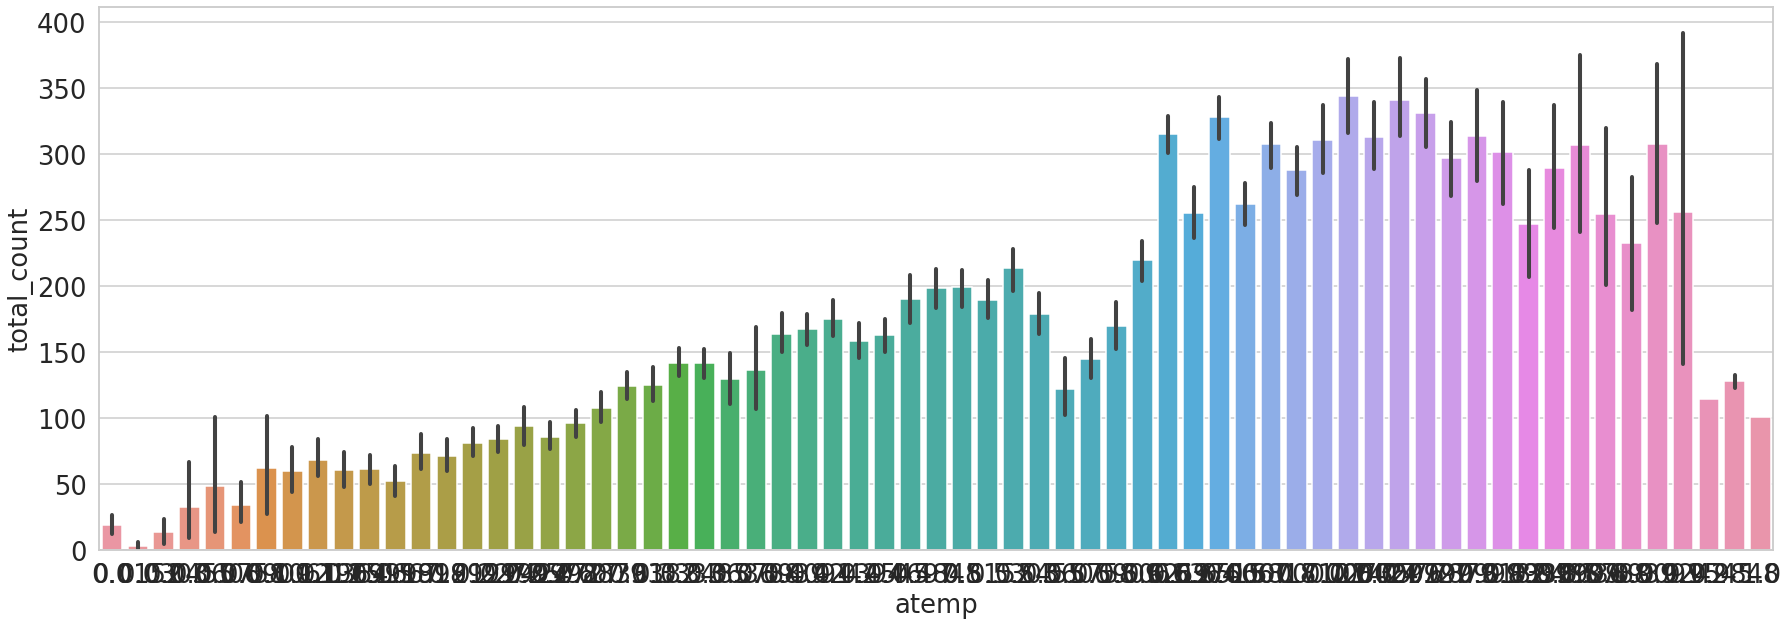

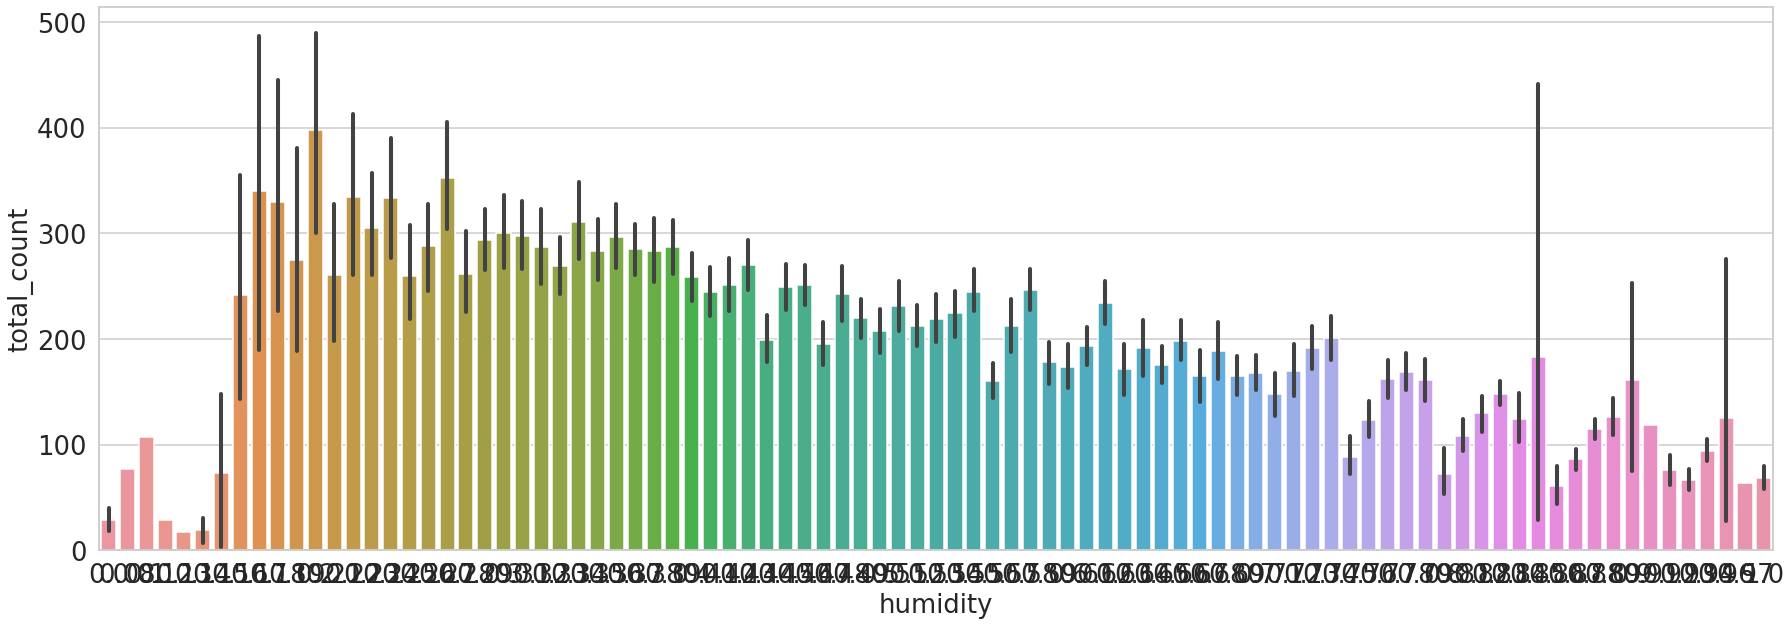

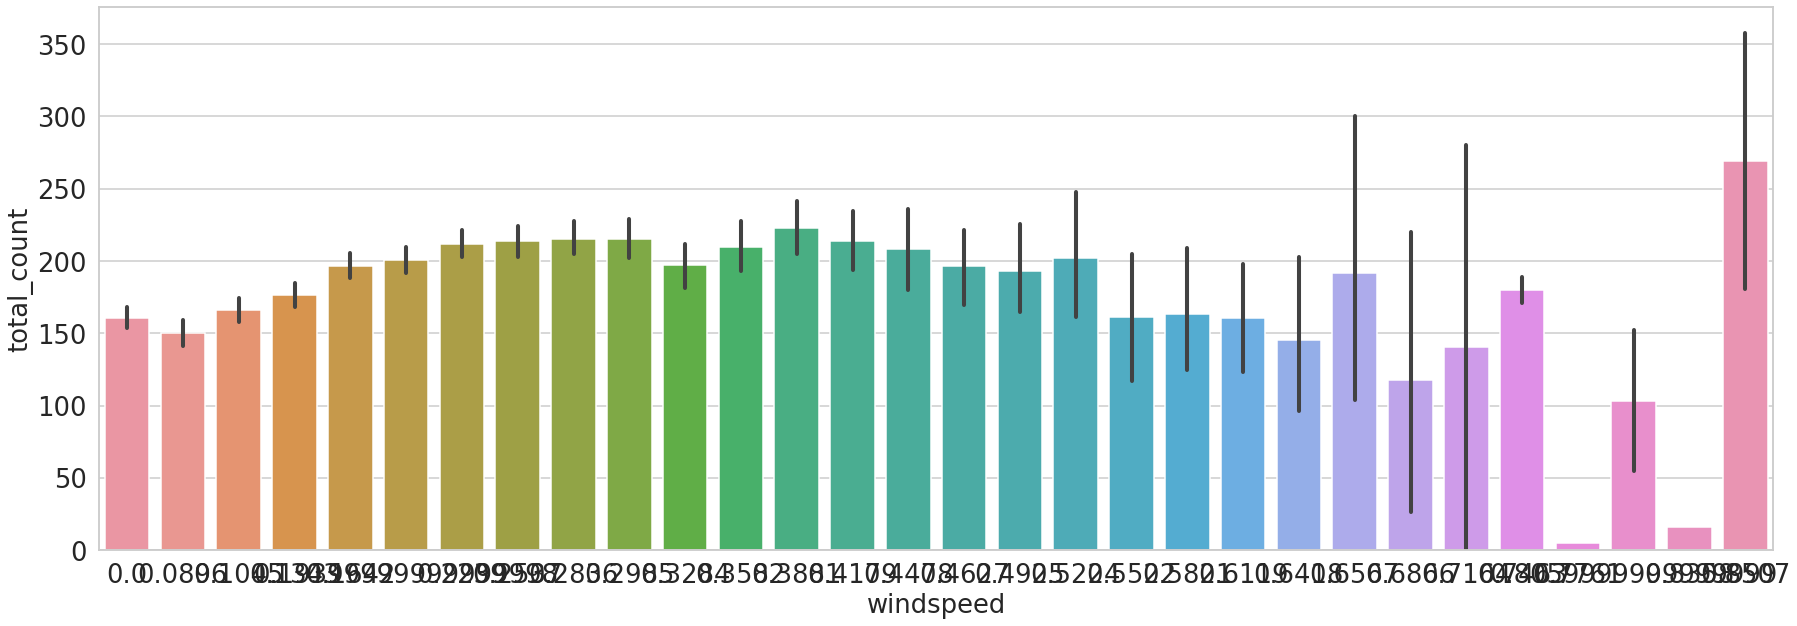

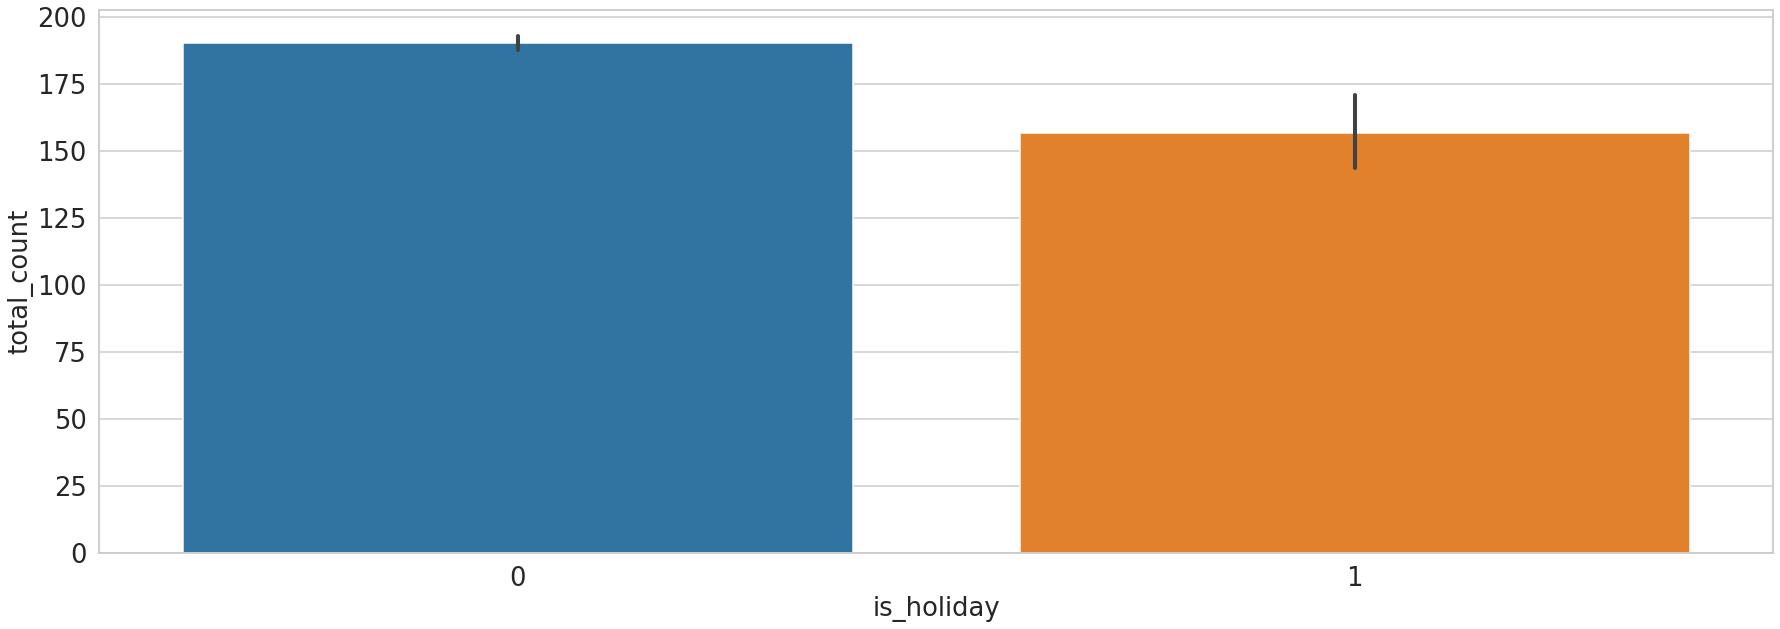

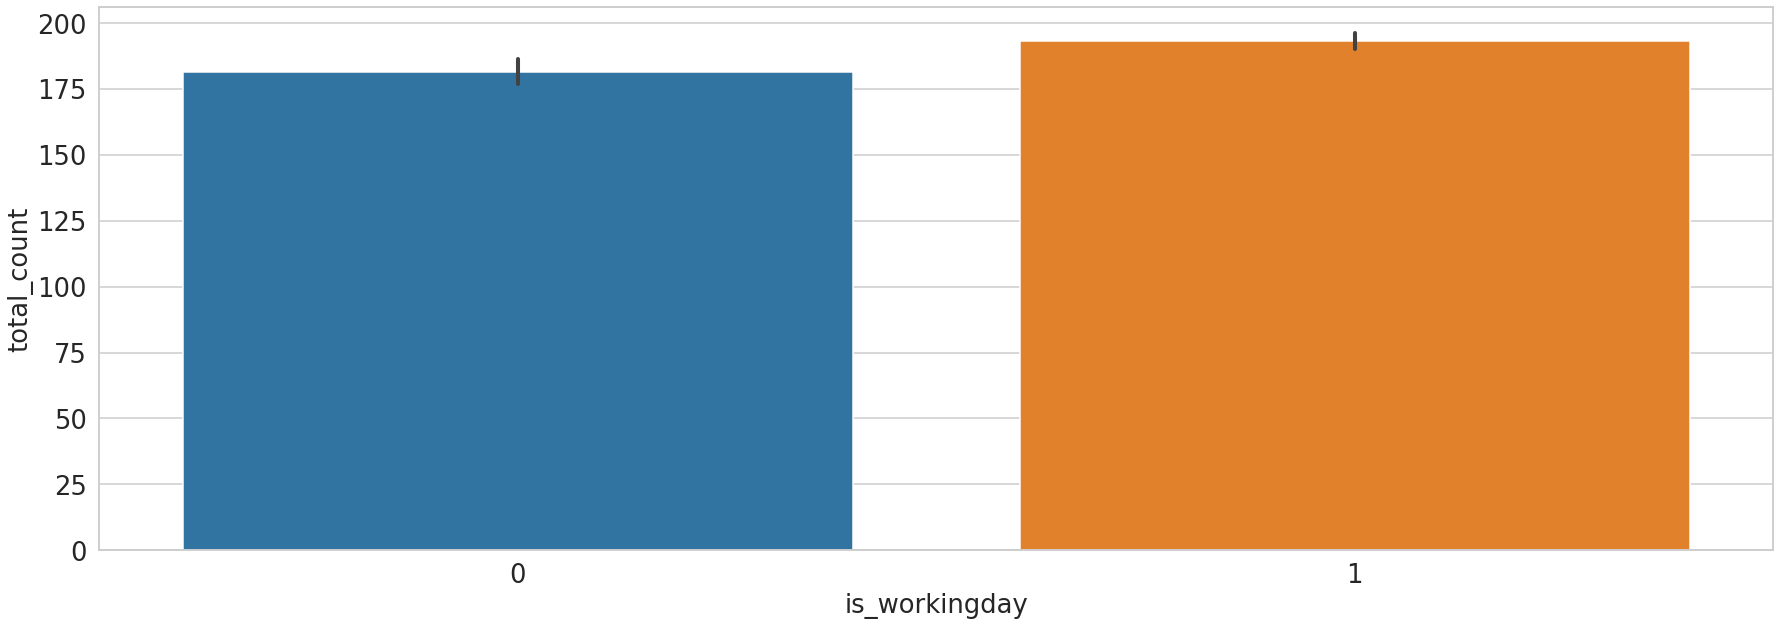

In [36]:
l = ['weather_condition',	'temp',	'atemp',	'humidity',	'windspeed', 'is_holiday', 'is_workingday']
for i in l:
  sns.barplot(
      data = data, 
      x = i, 
      y= 'total_count',
      )
  ax.set(title=i+' distribution of count') 
  plt.show()


- Above i just tried to find how various factors effects the counts for bikesharing 
- when weather condition is of 1st type the bike sharing count increases 
- when temp increases it increases but after some time it starts decreasing 
- windspeed doesnot affect the bike sharing as there's no trend 
- humidity at some point affect the bike sharing 
- is_working day  not much affect the count 
- In is_holiday we can see that when there's holiday there's slightly decrease in the count 